In [3]:
import igraph
import copy
import networkx as nx
import numpy as np
import pandas as pd
from matplotlib import pylab as plt
import os
import glob

import matplotlib.patches as mpatches
import matplotlib.lines as mlines
%matplotlib inline

#why need download?
#3m resolution

#1. copublish use Ox' license 
#2. slider
#recurring problem - needs to look at construction sites
#
# Green info - little engine for 
# can we find another source?
# 

In [4]:
""" get all files """
files = glob.glob('./matrix_csvs/*')

g_MW_files = sorted([f for f in files if ((f.split('/')[-1].split('_')[1]=='green')and (f.split('/')[-1].split('_')[2]=='MW.csv') ) ])
b_MW_files =sorted([f for f in files if ((f.split('/')[-1].split('_')[1]=='blue') and (f.split('/')[-1].split('_')[2]=='MW.csv') )])
all_MW_files = sorted([f for f in files if ((f.split('/')[-1].split('_')[1]=='all') and (f.split('/')[-1].split('_')[2]=='MW.csv'))])

print all_MW_files

['./matrix_csvs/2004.75_all_MW.csv', './matrix_csvs/2007.75_all_MW.csv', './matrix_csvs/2008.75_all_MW.csv', './matrix_csvs/2009.75_all_MW.csv', './matrix_csvs/2010.75_all_MW.csv', './matrix_csvs/2011.5_all_MW.csv', './matrix_csvs/2012.75_all_MW.csv', './matrix_csvs/2013.75_all_MW.csv', './matrix_csvs/2014.75_all_MW.csv', './matrix_csvs/2015.0_all_MW.csv', './matrix_csvs/2015.25_all_MW.csv', './matrix_csvs/2015.5_all_MW.csv', './matrix_csvs/2015.75_all_MW.csv', './matrix_csvs/2016.0_all_MW.csv', './matrix_csvs/2016.25_all_MW.csv', './matrix_csvs/2016.5_all_MW.csv', './matrix_csvs/2016.75_all_MW.csv', './matrix_csvs/2017.0_all_MW.csv', './matrix_csvs/2017.25_all_MW.csv', './matrix_csvs/2017.5_all_MW.csv', './matrix_csvs/2017.75_all_MW.csv']


In [5]:

""" get a dict going with files and data """
data = {}
years = range(2007,2018)
years_m = [2007,2008,2009,2010,2012,2013,2014,2015,2016,2017]
for y in years_m:
    fname_all = [f for f in all_MW_files if ((str(y)+'.75') in f)][0]
    fname_g = [f for f in g_MW_files if ((str(y)+'.75') in f)][0]
    fname_b = [f for f in b_MW_files if ((str(y)+'.75') in f)][0]
    data[y]={'year':y,
             'fname_all':fname_all,
             'data_all':0.0,
             'fname_g':fname_g,
             'data_g':0.0,
             'fname_b':fname_b,
             'data_b':0.0}
    
data[2011]={'data_b': 0.0,
            'data_g': 0.0,
            'year': 2011,
            'fname_g': './matrix_csvs/2011.5_green_MW.csv',
            'fname_b': './matrix_csvs/2011.5_blue_MW.csv',
            'data_all': 0.0,
            'fname_all': './matrix_csvs/2011.5_all_MW.csv'}
    
print data[2016]['data_all']

0.0


In [6]:
""" read in all the data """
for y in years:
    print y
    data[y]['data_all']=pd.read_csv(data[y]['fname_all'], encoding='utf-8').set_index('COMPANY')
    data[y]['data_g']=pd.read_csv(data[y]['fname_g'], encoding='utf-8').set_index('COMPANY')
    data[y]['data_b']=pd.read_csv(data[y]['fname_b'], encoding='utf-8').set_index('COMPANY')
    data[y]['data_ff'] = data[y]['data_all'].subtract(data[y]['data_g'], fill_value=0.0).subtract(data[y]['data_b'], fill_value=0.0)

2007
2008
2009
2010
2011
2012
2013
2014
2015
2016
2017


In [14]:

agg_statistics = {}

for y in years:
    agg_statistics[y]={}
    agg_statistics[y]['n_countries'] = data[y]['data_all'].count().count()
    agg_statistics[y]['n_companies'] = data[y]['data_all'].T.count().count()
    agg_statistics[y]['g_MW'] = data[y]['data_g'].sum().sum()
    agg_statistics[y]['b_MW'] = data[y]['data_b'].sum().sum()
    agg_statistics[y]['ff_MW'] = data[y]['data_ff'].sum().sum()

print agg_statistics

{2016: {'n_companies': 34618, 'g_MW': 731290.67100000172, 'ff_MW': 3777128.1490000049, 'n_countries': 226, 'b_MW': 1526197.4059999995}, 2017: {'n_companies': 34906, 'g_MW': 792316.19100000174, 'ff_MW': 3837374.553000004, 'n_countries': 226, 'b_MW': 1557796.1269999994}, 2007: {'n_companies': 20799, 'g_MW': 264090.88199999946, 'ff_MW': 2792440.6530000051, 'n_countries': 219, 'b_MW': 1250032.2429999998}, 2008: {'n_companies': 21978, 'g_MW': 301553.16499999934, 'ff_MW': 2944594.3740000064, 'n_countries': 221, 'b_MW': 1276715.2789999996}, 2009: {'n_companies': 23221, 'g_MW': 352480.32899999939, 'ff_MW': 3073736.4450000059, 'n_countries': 221, 'b_MW': 1305937.7669999998}, 2010: {'n_companies': 24406, 'g_MW': 398109.07030000165, 'ff_MW': 3229263.6830000058, 'n_countries': 222, 'b_MW': 1348976.2779999997}, 2011: {'n_companies': 25322, 'g_MW': 434396.93670000153, 'ff_MW': 3325672.6580000063, 'n_countries': 223, 'b_MW': 1355806.246}, 2012: {'n_companies': 27124, 'g_MW': 504704.94270000176, 'ff_M

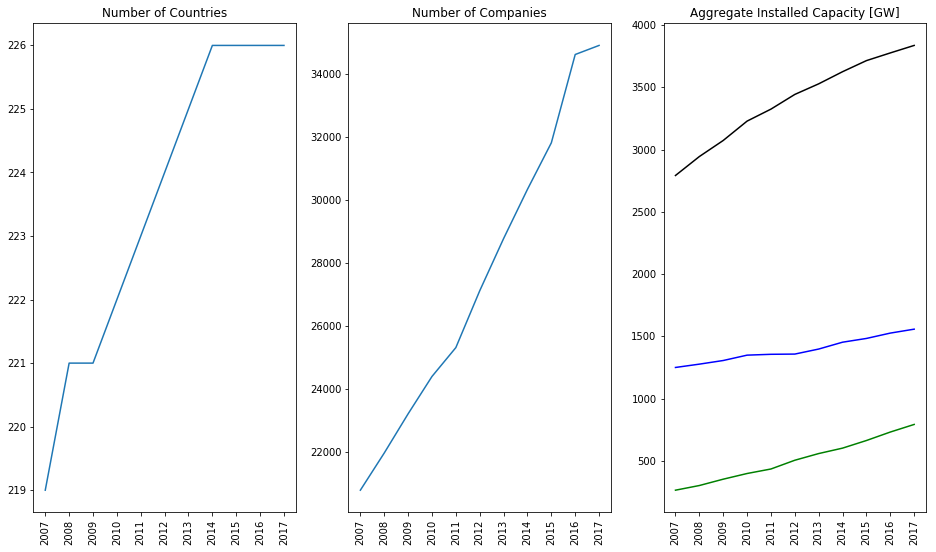

In [16]:
f, axarr = plt.subplots(nrows=1,ncols=3,sharex=True, figsize=(16,9))

#for r in axarr:
    #for c in r:
        #c.set_yscale('log')
        #c.set_xscale('log')
        #c.set_ylim(0,60)
        
data_str_dict = {0:'data_ff',1:'data_b',2:'data_g'}        
cols_dict = {0:'black',1:'blue',2:'green'}  
        
    
n_countries = [agg_statistics[y]['n_countries'] for y in years]
n_companies = [agg_statistics[y]['n_companies'] for y in years]
g_MW = [agg_statistics[y]['g_MW']/1000.0 for y in years]
b_MW = [agg_statistics[y]['b_MW']/1000.0 for y in years]
ff_MW = [agg_statistics[y]['ff_MW']/1000.0 for y in years]
        

axarr[0].plot(n_countries)
axarr[1].plot(n_companies)
axarr[2].plot(ff_MW, color=cols_dict[0])
axarr[2].plot(b_MW, color=cols_dict[1])
axarr[2].plot(g_MW, color=cols_dict[2])

    
axarr[0].set_title('Number of Countries')
axarr[1].set_title('Number of Companies')
axarr[2].set_title('Aggregate Installed Capacity [GW]')

for j in range(3):
    axarr[j].set_xticks(range(11))
    axarr[j].set_xticklabels([str(y) for y in years])
#print dir(axarr[0][0])

for j in range(3):
    plt.sca(axarr[j])
    plt.xticks(rotation='vertical')

#axarr[0][1].set_xticklabels(years)
#axarr[0][2].set_xticklabels(years)
#axarr[0][3].set_xticklabels(years)
#axarr[0][4].set_xticklabels(years)

f.savefig('./figures/aggregate_stats.png')
plt.show()
    

In [5]:
country_info = pd.read_csv('country_iso_regions.csv', encoding='utf-8').set_index('iso2')

print country_info


      Unnamed: 0                          country iso3  iso_num       region  \
iso2                                                                           
AF             0                      Afghanistan  AFG      4.0         ASIA   
AX             1                    Aland Islands  ALA    248.0       EUROPE   
AL             2                          Albania  ALB      8.0       EUROPE   
DZ             3                          Algeria  DZA     12.0       AFRICA   
AS             4                   American Samoa  ASM     16.0  ANZ-OCEANIA   
AD             5                          Andorra  AND     20.0       EUROPE   
AO             6                           Angola  AGO     24.0       AFRICA   
AI             7                         Anguilla  AIA    660.0        LATIN   
AQ             8                       Antarctica  ATA     10.0  ANZ-OCEANIA   
AG             9              Antigua and Barbuda  ATG     28.0        LATIN   
AR            10                        

In [8]:
print data[2017]['data_all'].sum()
print data[2017]['data_g'].sum()

print data[2017]['data_g'].sum()/data[2017]['data_all'].sum()

UA      52031.090
CZ      19269.788
HR       4696.046
BG      11667.600
CU       5913.118
AU      60750.593
AR      36329.181
BR     156907.979
SV       1891.981
TH      48475.623
SY      10538.665
IN     341671.998
GB      93633.266
MX      74753.491
ES     103293.292
KR     114490.289
PK      31010.692
EG      43004.440
PE      13221.001
KY        211.093
VN      40993.966
NL      26093.697
IT     105866.118
DE     148080.746
DK      10803.595
NO      34457.763
SG      14513.556
BE      18747.164
FI      18752.131
CH      18766.485
         ...     
FJ        346.568
LR        199.272
BI         41.139
MC          3.008
GD         43.512
LA       6534.460
NC        829.891
AQ         24.348
AI         27.047
MT        596.780
TT       2151.365
AD         63.800
LC         85.820
BM        193.600
TK          1.010
TO         20.046
DM         25.575
TC         62.735
BW        957.928
KN         74.673
GS          0.230
VU         33.622
LS         78.246
TG        308.704
FK        

In [9]:
for y in years:
    country_info[str(y)+'_all'] = data[y]['data_all'].sum()
    country_info[str(y)+'_g'] = data[y]['data_g'].sum()
    country_info[str(y)+'_b'] = data[y]['data_b'].sum()
    country_info[str(y)+'_portion'] = data[y]['data_g'].sum()/data[y]['data_all'].sum()

In [10]:
print country_info
country_info.to_csv('all_portions.csv')

      Unnamed: 0                          country iso3  iso_num       region  \
iso2                                                                           
AF             0                      Afghanistan  AFG      4.0         ASIA   
AX             1                    Aland Islands  ALA    248.0       EUROPE   
AL             2                          Albania  ALB      8.0       EUROPE   
DZ             3                          Algeria  DZA     12.0       AFRICA   
AS             4                   American Samoa  ASM     16.0  ANZ-OCEANIA   
AD             5                          Andorra  AND     20.0       EUROPE   
AO             6                           Angola  AGO     24.0       AFRICA   
AI             7                         Anguilla  AIA    660.0        LATIN   
AQ             8                       Antarctica  ATA     10.0  ANZ-OCEANIA   
AG             9              Antigua and Barbuda  ATG     28.0        LATIN   
AR            10                        